### COVID-19 Prediction Week4 - Non-overlapping data

https://www.kaggle.com/c/covid19-global-forecasting-week-4

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


#### Read and organize the data

In [2]:
dfTr = pd.read_csv("../Data/train.csv", parse_dates=['Date'])
dfTe = pd.read_csv("../Data/test.csv", parse_dates=['Date'])

dfTr["Province_State"] = dfTr["Province_State"].fillna('')
dfTe["Province_State"] = dfTe["Province_State"].fillna('')

dfTr["Region"] = dfTr.Country_Region + '_' + dfTr.Province_State
dfTe["Region"] = dfTe.Country_Region + '_' + dfTe.Province_State

dfOut = dfTe.copy()

dfTr.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Region
0,1,,Afghanistan,2020-01-22,0.0,0.0,Afghanistan_
1,2,,Afghanistan,2020-01-23,0.0,0.0,Afghanistan_
2,3,,Afghanistan,2020-01-24,0.0,0.0,Afghanistan_
3,4,,Afghanistan,2020-01-25,0.0,0.0,Afghanistan_
4,5,,Afghanistan,2020-01-26,0.0,0.0,Afghanistan_


In [3]:
dfTe.iloc[:,3:5].shape

(13459, 2)

In [4]:
stDate = pd.to_datetime(dfTr.Date.min())

dfTr['DaysFromStart'] = (pd.to_datetime(dfTr.Date) - stDate).dt.days
dfTe['DaysFromStart'] = (pd.to_datetime(dfTe.Date) - stDate).dt.days


In [5]:
dfTr.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Region,DaysFromStart
0,1,,Afghanistan,2020-01-22,0.0,0.0,Afghanistan_,0
1,2,,Afghanistan,2020-01-23,0.0,0.0,Afghanistan_,1
2,3,,Afghanistan,2020-01-24,0.0,0.0,Afghanistan_,2
3,4,,Afghanistan,2020-01-25,0.0,0.0,Afghanistan_,3
4,5,,Afghanistan,2020-01-26,0.0,0.0,Afghanistan_,4


In [6]:
dfTr.Region = dfTr.Region.str.replace('*','')
dfTe.Region = dfTe.Region.str.replace('*','')

RegUniq = np.unique(dfTr.Region)
RegUniq.shape

(313,)

#### Plot day stats

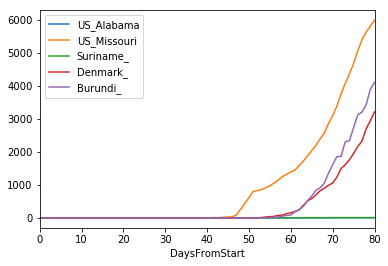

In [7]:
import matplotlib.pyplot as plt
import random
numReg = 5

selReg = random.choices(RegUniq, k=numReg)
dfTmp = dfTr[dfTr.Region.isin(selReg)]
selReg
fig = plt.figure()
ax = fig.add_subplot(111)

lines = dfTmp.groupby('Region').plot(x='DaysFromStart', y='ConfirmedCases', ax=ax)
ax.legend(selReg, loc='best')
plt.show()

### Make train/test sets

In [8]:
print('Train dates : ' + str(dfTr.DaysFromStart.min()) + ' to ' + str(dfTr.DaysFromStart.max()))
print('Test dates : ' + str(dfTe.DaysFromStart.min()) + ' to ' + str(dfTe.DaysFromStart.max()))
print('')
print('Train dates : ' + str(dfTr.Date.min()) + ' to ' + str(dfTr.Date.max()))
print('Test dates : ' + str(dfTe.Date.min()) + ' to ' + str(dfTe.Date.max()))

Train dates : 0 to 80
Test dates : 71 to 113

Train dates : 2020-01-22 00:00:00 to 2020-04-11 00:00:00
Test dates : 2020-04-02 00:00:00 to 2020-05-14 00:00:00


In [9]:
dfTr.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,Region,DaysFromStart
0,1,,Afghanistan,2020-01-22,0.0,0.0,Afghanistan_,0
1,2,,Afghanistan,2020-01-23,0.0,0.0,Afghanistan_,1
2,3,,Afghanistan,2020-01-24,0.0,0.0,Afghanistan_,2
3,4,,Afghanistan,2020-01-25,0.0,0.0,Afghanistan_,3
4,5,,Afghanistan,2020-01-26,0.0,0.0,Afghanistan_,4


In [10]:
## Rotate the datframe 
dfTr2 = dfTr.pivot(index='Region', columns='DaysFromStart', values='ConfirmedCases')
dfTr2.head()

DaysFromStart,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273.0,281.0,299.0,349.0,367.0,423.0,444.0,484.0,521.0,555.0
Albania_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,277.0,304.0,333.0,361.0,377.0,383.0,400.0,409.0,416.0,433.0
Algeria_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,986.0,1171.0,1251.0,1320.0,1423.0,1468.0,1572.0,1666.0,1761.0,1825.0
Andorra_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,428.0,439.0,466.0,501.0,525.0,545.0,564.0,583.0,601.0,601.0
Angola_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,8.0,10.0,14.0,16.0,17.0,19.0,19.0,19.0,19.0


In [11]:
dataMat = np.array(dfTr2)
dataMat.shape

(313, 81)

In [22]:
from sklearn.model_selection import train_test_split

X = dataMat[:,0:71]
Y = dataMat[:,71:]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42)


In [30]:
Y_train.shape

(187, 10)

#### DL model

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop


ModuleNotFoundError: No module named 'keras'

In [ ]:
## Show predictions
dfTeWithPred.head()

In [ ]:
## Prepare submission file
dfOut = dfTeWithPred[['ForecastId', 'ConfirmedCases', 'Fatalities']].round().astype(int)
dfOut.head()

### Show predictions

In [ ]:
## Show predictions

print(tmpReg)

fig, ax = plt.subplots(figsize = [16, 8])

plt.plot(XTr, yccTr, linewidth = 4, alpha=0.5)
plt.plot(XTe, predCC, 'g.')
plt.show()


### Show predictions

In [ ]:
## Show predictions

SelReg = 'Sweden_'
#SelReg = 'Italy_'
#SelReg = 'US_Pennsylvania'
SelVar = 'ConfirmedCases'
#SelVar = 'Fatalities'

dfSel = dfTr[dfTr.Region == SelReg]
xTr = dfSel.DaysFromStart
yTr = dfSel[SelVar]

dfSel = dfTe2[dfTe2.Region == SelReg]
xTe2 = dfSel.DaysFromStart
yTe2 = dfSel[SelVar]

dfSel = dfTeWithPred[dfTeWithPred.Region == SelReg]
xTe = dfSel.DaysFromStart
yTe = dfSel[SelVar]

fig, ax = plt.subplots(figsize = [16, 8])
fig.canvas.draw()

ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.plot(xTr, yTr, linewidth=5, alpha=0.5)
ax.plot(xTe2, yTe2, 'g', linewidth=5, alpha=0.5)
ax.plot(xTe, yTe, 'r.')

plt.xticks(rotation=10)
plt.show()


### Show US predictions

In [ ]:
dfTr[dfTr.Region.str.contains('US_')].Region.unique()

In [ ]:
## Get all US data
dfTrUS = dfTr[dfTr.Country_Region=='US']
dfTrUS = dfTrUS.groupby(['Date','DaysFromStart'])[['ConfirmedCases','Fatalities']].sum().reset_index()
dfTrUS.head()

dfTe2US = dfTe2[dfTe2.Country_Region=='US']
dfTe2US = dfTe2US.groupby(['Date','DaysFromStart'])[['ConfirmedCases','Fatalities']].sum().reset_index()
dfTe2US.head()

dfTeUS = dfTeWithPred[dfTeWithPred.Country_Region=='US']
dfTeUS = dfTeUS.groupby(['Date','DaysFromStart'])[['ConfirmedCases','Fatalities']].sum().reset_index()
dfTeUS.head()

In [ ]:
SelVar = 'ConfirmedCases'
#SelVar = 'Fatalities'

dfSelTr = dfTrUS
xTr = dfSelTr.DaysFromStart
yTr = dfSelTr[SelVar]

dfSel = dfTe2US
xTe2 = dfSel.DaysFromStart
yTe2 = dfSel[SelVar]

dfSelTe = dfTeUS
xTe = dfSelTe.DaysFromStart
yTe = dfSelTe[SelVar]

fig, ax = plt.subplots(figsize = [16, 8])
fig.canvas.draw()

ax.xaxis.set_major_locator(plt.MaxNLocator(30))
ax.plot(xTr, yTr, linewidth=5, alpha=0.5)
ax.plot(xTe2, yTe2, 'g', linewidth=5, alpha=0.5)
ax.plot(xTe, yTe, 'r.')
#plt.xticks(dfSel.Date.tolist())

plt.xticks(rotation=70)
plt.show()

#dfSelTr.Date.tolist()

#a,b = plt.xticks()


### Evaluate prediction accuracy

In [ ]:
dfOut = dfTeWithPred[dfTeWithPred.DaysFromStart <= dfTe2.DaysFromStart.max()]
dfOut.head()

In [ ]:
dfTe2.head()

In [ ]:
dfOut=dfOut[['ForecastId','Region','DaysFromStart','ConfirmedCases','Fatalities']]
dfTe2=dfTe2[['Region','DaysFromStart','ConfirmedCases','Fatalities']]
dfOut = dfOut.merge(dfTe2, how='outer', left_on=['Region','DaysFromStart'], right_on=['Region','DaysFromStart'], suffixes=['_Pred', ''])


In [ ]:
dfOut.columns

In [ ]:
rmsleCC = np.sqrt((np.square(np.log(dfOut['ConfirmedCases_Pred'] + 1) - np.log(dfOut.ConfirmedCases + 1))).mean())
rmsleCC

In [ ]:
rmsleFAT = np.sqrt((np.square(np.log(dfOut['Fatalities_Pred'] + 1) - np.log(dfOut.Fatalities + 1))).mean())
rmsleFAT

In [ ]:
np.mean([rmsleCC, rmsleFAT])